In [1]:
import os
import numpy as np  # type: ignore
import zipfile
from urllib.request import urlretrieve
from os.path import isfile, isdir
import seaborn as sns; sns.set() # type: ignore
import matplotlib.pyplot as plt # type: ignore

def download_files():
    """
    Este metodo descarga los archivos de imagenes sino existen
    """
    path_tar = os.path.join("data", r'C:\Users\CRISTIAN\Downloads\rawdata.zip')
    if not isfile(path_tar):
        urlretrieve(
            'http://courses.media.mit.edu/2002fall/mas622j/proj/faces/rawdata.zip',
            path_tar)
    dest_path =  "data/faces"
    with zipfile.ZipFile(path_tar) as zipf:
        zipf.extractall(dest_path)

download_files()


In [4]:
#importar los datos de test del total de los datos

import os
import shutil


# Directorio de imágenes
d_name = r'C:\Users\CRISTIAN\Downloads\rawdata\rawdata'
output_dir = r'C:\Users\CRISTIAN\Downloads\rawdata\test_faces'

# Crear el directorio de salida si no existe
os.makedirs(output_dir, exist_ok=True)

# Lista de imágenes de prueba
test_faces = '4831,3228,4469,1927,1329,5109,2922,2748,4679,1905,4813,3038,3804,2777,4480,3497,2545,2121,2313,5136,1596,4222,1750,3007,3235,4010,1562,3651,2783,4474,4646,1334,3463,3803,1768,4028,4814,1902,3669,2589,2119,2925,4641,1333,3464,3656,2784,4473,3232,4017,1565,4225,1757,3000,2314,5131,1591,2126,3490,2542,2770,4487,1934,4648,3009,3835,4822,2913,5138,1598,2779,3499,4021,1553,3204,3036,4213,1761,2580,3452,4677,1305,4445,3660,2574,4683,2746,3694,5107,2322,2110,1795,4489,2128,2914,4019,4825,1759,3832,3658,1933,2117,1792,5100,2325,2741,3693,2573,4684,4442,3667,2587,3455,4670,1302,3031,4214,1766,4026,1554,3203,2371,5154,4086,3091,2143,2527,2715,1356,4624,3401,3633,4416,1958,3257,2385,1500,4072,1732,4240,3859,3065,1993,2518,3892,2940,4885,3866,2188,4871,3268,4429,1967,1369,1735,4247,3062,3250,2382,1507,4849,4075,3634,4411,1351,4623,3406,2712,2520,2978,3096,2144,2376,5153,4081,3439,1960,1538,4876,5198,3861,4278,4882,2349,3895,2947,1994,1969,4427,3602,3430,1367,4615,3868,2186,3054,1703,4271,1531,4043,5191,3266,2172,4285,5165,2340,3292,2724,2516,1393,3259,4840,2985,3857,1358,1956,4418,2529,4088,2971,2511,1394,2723,5162,2347,3295,2949,2175,4282,4878,1536,4044,5196,3261,2181,3053,1704,4276,3437,1360,4612,4420,3605,2976,3098,2378,1951,3408,4249,2982,3850,4847,1509,1758,3833,4824,4018,3659,1932,4488,2915,2129,2586,3454,1303,4671,4443,3666,1555,4027,3202,3030,1767,4215,5101,2324,2116,1793,2572,4685,2740,3692,1599,5139,2912,3498,2778,4649,1935,4823,3834,3008,2747,3695,2575,4682,2111,1794,5106,2323'

# Convertir la lista a un conjunto de enteros
test_faces_set = set(map(int, test_faces.split(',')))

# Iterar sobre los archivos en el directorio
for nfile in os.listdir(d_name):

        if int(nfile) in test_faces_set:
            src = os.path.join(d_name, nfile)
            dst = os.path.join(output_dir, nfile)
            try:
                shutil.move(src, dst)
                print(f'Movido: {src} -> {dst}')
            except FileNotFoundError:
                print(f'Archivo no encontrado: {src}')
            except Exception as e:
                print(f'Error al mover {src}: {e}')


In [2]:
import os
import random
from PIL import Image # type: ignore

# Directorio de imágenes
d_name_test = r'C:\Users\CRISTIAN\Downloads\rawdata\test_faces'
d_name_train = r'C:\Users\CRISTIAN\Downloads\rawdata\rawdata'
image_size = (128, 128) 
sample = 1

X_train = []
X_test = []

# Iterar sobre los archivos en el directorio
for nfile in os.listdir(d_name_train):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name_train,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X_train.append(np.array(img).flatten())

# Convertir la lista a un arreglo NumPy
X_train = np.array(X_train)
print(X_train.shape)

# Iterar sobre los archivos en el directorio
for nfile in os.listdir(d_name_test):
    if random.random() <= sample:
        bytes_read = open(os.path.join(d_name_test,nfile), "rb").read()
        img = Image.frombytes('L', (128,128), bytes_read)
        X_test.append(np.array(img).flatten())

# Convertir la lista a un arreglo NumPy
X_test = np.array(X_test)
print(X_test.shape)


(3693, 16384)
(300, 16384)


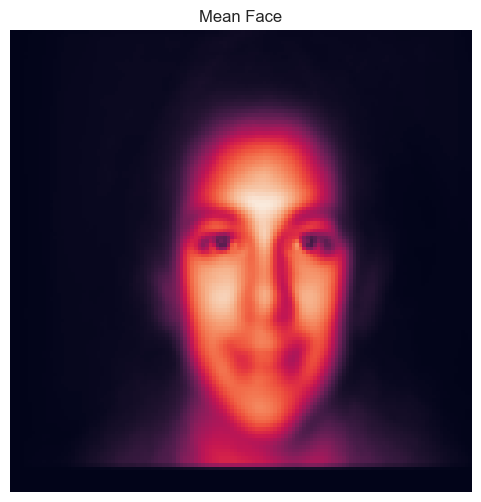

In [3]:
# Verificar que hay imágenes cargadas para continuar buscando la cara promedio
if X_test.shape[0] == 0:
    raise ValueError("No se cargaron imágenes.")

# Paso 1: Sumar todos los vectores de imágenes
sum_vector = np.sum(X_test, axis=0)

# Paso 2: Promediar los vectores
mean_vector = sum_vector / X_test.shape[0]

# Paso 3: Convertir el vector promedio a una imagen 2D(128,128)
mean_image = mean_vector.reshape(image_size)

plt.figure(figsize=(6, 6))
plt.imshow(mean_image)
plt.title("Mean Face")
plt.axis('off')
plt.show()

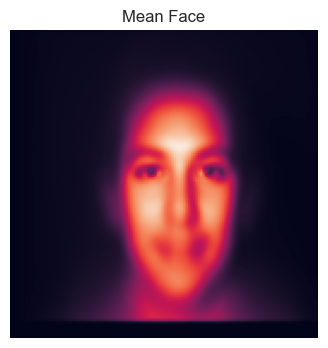

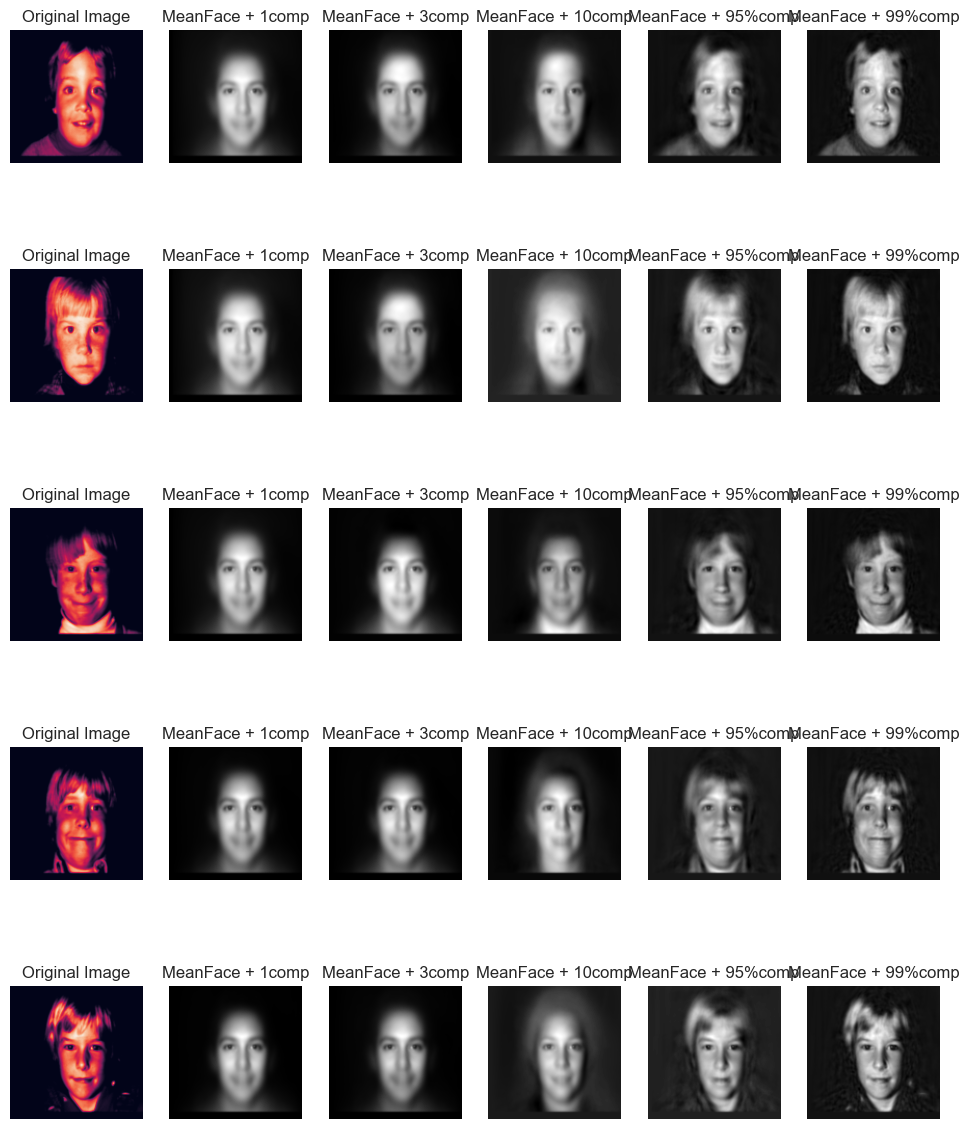

"import pandas as pd\ntest_data_reduced_df = pd.DataFrame(reduced_test_data)\ntest_data_reduced_df.to_csv('reduced_test_data.csv', index=False)"

In [9]:
#funciona con librerias pero falta el csv

import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Supongamos que X_train es tu matriz de datos de entrenamiento con tamaño (300, 16384)
# y X_test es la matriz de datos de prueba

# Paso 1: Calcular y visualizar la Mean Face
mean_face = np.mean(X_train, axis=0).reshape(image_size)
plt.figure(figsize=(6, 4))
plt.imshow(mean_face)
plt.title('Mean Face')
plt.axis('off')
plt.show()

# Centrar los datos
centered_data = X_train - np.mean(X_train, axis=0)

# Paso 2: Aplicar PCA y reconstrucción con diferentes números de componentes
def pca_reconstruction(X, mean_face, n_components):
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(X - mean_face)
    reconstructed_data = pca.inverse_transform(reduced_data) + mean_face
    return reconstructed_data

# Reconstruir los datos con diferentes números de componentes
reconstructed_1comp = pca_reconstruction(X_train, np.mean(X_train, axis=0), 1)
reconstructed_3comp = pca_reconstruction(X_train, np.mean(X_train, axis=0), 3)
reconstructed_10comp = pca_reconstruction(X_train, np.mean(X_train, axis=0), 10)

# Componentes que explican el 95% de la varianza
pca_95 = PCA(n_components=0.95)
reduced_data_95 = pca_95.fit_transform(X_train - np.mean(X_train, axis=0))
reconstructed_95comp = pca_95.inverse_transform(reduced_data_95) + np.mean(X_train, axis=0)

# Componentes que explican el 99% de la varianza
pca_99 = PCA(n_components=0.99)
reduced_data_99 = pca_99.fit_transform(X_train - np.mean(X_train, axis=0))
reconstructed_99comp = pca_99.inverse_transform(reduced_data_99) + np.mean(X_train, axis=0)

# Preparar datos para visualización
def plot_images(original, reconstructed, titles):
    num_images = len(original)
    num_titles = len(titles)
    
    plt.figure(figsize=(12, num_images * 3))
    
    for i in range(num_images):
        plt.subplot(num_images, num_titles + 1, i * (num_titles + 1) + 1)
        plt.imshow(original[i].reshape(image_size))
        plt.title('Original Image')
        plt.axis('off')
        
        for j, (title, recon_image) in enumerate(reconstructed.items()):
            plt.subplot(num_images, num_titles + 1, i * (num_titles + 1) + j + 2)
            plt.imshow(recon_image[i].reshape(image_size), cmap="gray")
            plt.title(f'MeanFace + {title}')
            plt.axis('off')

    plt.show()

# Reconstrucción de imágenes
reconstructed = {
    '1comp': reconstructed_1comp,
    '3comp': reconstructed_3comp,
    '10comp': reconstructed_10comp,
    '95%comp': reconstructed_95comp,
    '99%comp': reconstructed_99comp
}

# Visualizar los resultados
plot_images(
    original=X_train[:5],  # Primeras 5 imágenes originales
    reconstructed=reconstructed,
    titles=['1', '3', '10', '95%', '99%']
)

# Paso 5: Aplicar PCA a los datos de prueba
pca_test = PCA(n_components=1)
reduced_test_data = pca_test.fit_transform(X_test - np.mean(X_train, axis=0))

# Guardar los datos transformados en un archivo CSV
"""import pandas as pd
test_data_reduced_df = pd.DataFrame(reduced_test_data)
test_data_reduced_df.to_csv('reduced_test_data.csv', index=False)"""


ValueError: 'virides' is not a valid value for cmap; supported values are 'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

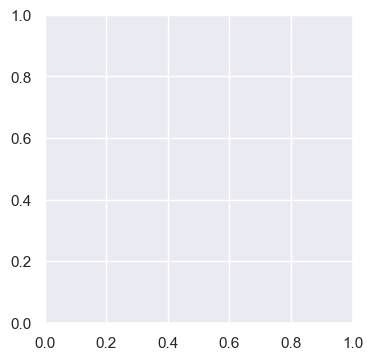

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# X_train es tu matriz de datos de entrenamiento con tamaño (3693, 16384)
# y X_test es la matriz de datos de prueba (300, 16384)

# Paso 1: Calcular y visualizar la Mean Face
mean_face = np.mean(X_train, axis=0).reshape(image_size)
plt.figure(figsize=(6, 4))
plt.imshow(mean_face)
plt.title('Mean Face')
plt.axis('off')
plt.show()

# Centrar los datos
mean_face_train = np.mean(X_train, axis=0)

# Paso 2: Aplicar PCA a los datos de entrenamiento para obtener las componentes principales
pca = PCA(n_components=0.95)  # Hasta 95% de la varianza explicada
pca.fit(X_train - mean_face_train)

# Paso 3: Reconstruir los datos de prueba con diferentes números de componentes principales
def pca_reconstruction(X_test, mean_face_train, pca, n_components):
    reduced_data = pca.transform(X_test - mean_face_train)[:, :n_components]  # Usar sólo las n_components
    reconstructed_data = pca.inverse_transform(np.hstack([reduced_data, np.zeros((reduced_data.shape[0], pca.n_components_ - n_components))])) + mean_face_train
    return reconstructed_data

# Reconstruir las caras del conjunto de prueba
reconstructed_1comp = pca_reconstruction(X_test, mean_face_train, pca, 1)
reconstructed_3comp = pca_reconstruction(X_test, mean_face_train, pca, 3)
reconstructed_10comp = pca_reconstruction(X_test, mean_face_train, pca, 10)

# Reconstrucción usando el 95% de la varianza
reconstructed_95comp = pca.inverse_transform(pca.transform(X_test - mean_face_train)) + mean_face_train

# Paso 4: Visualizar las imágenes originales y reconstruidas
def plot_reconstructed_images(X_original, X_reconstructed_list, titles, image_size, num_images=4):
    plt.figure(figsize=(15, 5 * num_images))
    for i in range(num_images):
        # Imagen original
        plt.subplot(num_images, len(X_reconstructed_list) + 1, i * (len(X_reconstructed_list) + 1) + 1)
        plt.imshow(X_original[i].reshape(image_size), cmap='gray')
        plt.title(f'Original Image {i+1}')
        plt.axis('off')
        
        # Imágenes reconstruidas
        for j, (X_reconstructed, title) in enumerate(zip(X_reconstructed_list, titles)):
            plt.subplot(num_images, len(X_reconstructed_list) + 1, i * (len(X_reconstructed_list) + 1) + 2 + j)
            plt.imshow(X_reconstructed[i].reshape(image_size), cmap='gray')
            plt.title(title)
            plt.axis('off')
    plt.show()

# Títulos de las reconstrucciones
titles = ['MeanFace + 1 comp', 'MeanFace + 3 comp', 'MeanFace + 10 comp', 'MeanFace + 95% comp']

# Visualizar las primeras 4 caras originales y reconstruidas
plot_reconstructed_images(X_test, [reconstructed_1comp, reconstructed_3comp, reconstructed_10comp, reconstructed_95comp], titles, image_size, num_images=4)



In [17]:
#por separado
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

# Funciones de entrenamiento

def calculate_mean_face(X_train):
    """ Calcula la cara media a partir de los datos de entrenamiento. """
    return np.mean(X_train, axis=0)

def center_data(X, mean_face):
    """ Centra los datos restando la cara media. """
    return X - mean_face

def pca_fit(X_train, n_components):
    """ Ajusta el modelo PCA a los datos de entrenamiento. """
    pca = PCA(n_components=n_components)
    reduced_data = pca.fit_transform(X_train)
    return pca, reduced_data

# Entrenamiento
def train(X_train):
    """ Entrena el modelo PCA y calcula la cara media. """
    mean_face = calculate_mean_face(X_train)
    X_train_centered = center_data(X_train, mean_face)
    
    # Ajustar PCA con 1 componente (puedes ajustar el número de componentes según sea necesario)
    pca, _ = pca_fit(X_train_centered, 1)
    
    return pca, mean_face

# Suponiendo que X_train es el conjunto de datos de entrenamiento
# X_train = ...

# Ejecutar entrenamiento
pca, mean_face = train(X_train)


In [18]:
# Funciones de prueba

def pca_reconstruction(X, pca, mean_face):
    """ Reconstruye los datos a partir de la transformación PCA. """
    reduced_data = pca.transform(X)
    reconstructed_data = pca.inverse_transform(reduced_data) + mean_face
    return reconstructed_data, reduced_data

def calculate_mse(original, reconstructed):
    """ Calcula el error cuadrático medio entre datos originales y reconstruidos. """
    return mean_squared_error(original, reconstructed)

def create_submission_file(test_ids, first_component, filename='submission.csv'):
    """ Crea un archivo CSV con el primer componente PCA para las predicciones. """
    first_component = np.round(first_component, 6)
    submission_df = pd.DataFrame({
        'ID': test_ids,
        'label': first_component
    })
    # Convertir los valores de 'label' a string con el formato deseado
    submission_df['label'] = submission_df['label'].apply(lambda x: f"{x:,.6f}" if x >= 0 else f"{x:,.6f}".replace("-", " -"))
    # Convertir la columna de 'label' nuevamente a tipo float (sin comillas en el CSV)
    submission_df['label'] = submission_df['label'].apply(lambda x: float(x.replace(",", "")))
    
    submission_df.to_csv(filename, index=False)
    print(f"Archivo de envío guardado como '{filename}'")
    return submission_df

# Prueba
def test(X_test, pca, mean_face, ID_LIST):
    """ Realiza la prueba y crea el archivo de envío con los resultados. """
    X_test_centered = center_data(X_test, mean_face)
    
    # Realizar PCA con 1 componente
    reconstructed_data_1comp, reduced_data_1comp = pca_reconstruction(X_test_centered, pca, mean_face)
    
    # Crear archivo de envío con el primer componente PCA
    submission_df = create_submission_file(ID_LIST, reduced_data_1comp[:, 0])
    
    # Verificar las columnas del DataFrame
    print("\nColumnas del archivo de envío:")
    print(submission_df.columns.tolist())
    
    # Mostrar las primeras 5 filas del archivo de envío
    print("\nPrimeras 5 filas del archivo de envío:")
    print(submission_df.head().to_string(index=False))
    
    # Realizar PCA con diferentes números de componentes para comparación
    for n_components in [3, 20]:
        pca, _ = pca_fit(X_test_centered, n_components)
        reconstructed, _ = pca_reconstruction(X_test_centered, pca, mean_face)
        mse = calculate_mse(X_test, reconstructed)
        print(f"MSE con {n_components} componentes: {mse}")
    
    # PCA para capturar el 95% de la varianza
    pca_95 = PCA(n_components=0.95)
    reduced_data_95 = pca_95.fit_transform(X_test_centered)
    reconstructed_95 = pca_95.inverse_transform(reduced_data_95) + mean_face
    mse_95 = calculate_mse(X_test, reconstructed_95)
    print(f"MSE con 95% de varianza explicada ({pca_95.n_components_} componentes): {mse_95}")

# Suponiendo que X_test es el conjunto de datos de prueba y ID_LIST es la lista de IDs de prueba
# X_test = ...
# ID_LIST = ...

# Ejecutar prueba
test(X_test, pca, mean_face, ID_LIST)

Archivo de envío guardado como 'submission.csv'

Columnas del archivo de envío:
['ID', 'label']

Primeras 5 filas del archivo de envío:
  ID        label
1302  -418.504795
1303   402.204102
1305   438.089170
1329 -1426.776089
1333  -802.432992
MSE con 3 componentes: 586.6688210515365
MSE con 20 componentes: 239.58532023270757
MSE con 95% de varianza explicada (93 componentes): 56.91200324819631
